In [1]:
%matplotlib inline
import pandas as pd

In [44]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [46]:
titles = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [30]:
titles.title.value_counts().head(10)

Around the World in 80 Days           1364
Hello Au Revoir                        726
7 cajas                                689
Thelma                                 593
The Ten Commandments                   536
The Eschatrilogy: Book of the Dead     517
Cockneys vs Zombies                    496
Catching Faith                         492
The Dark Knight Rises                  458
The Buccaneer                          437
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [31]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    27676
1936    26019
1938    25450
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

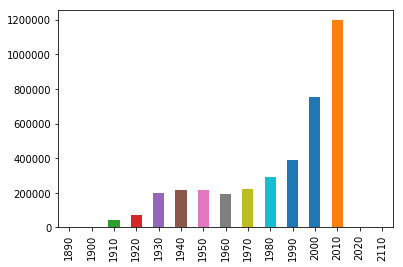

In [32]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

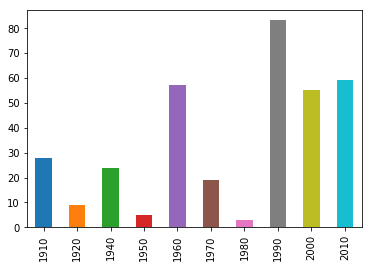

In [33]:
hamlet = t[t.title == 'Hamlet']
(hamlet.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

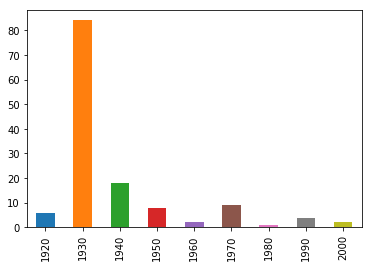

In [34]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

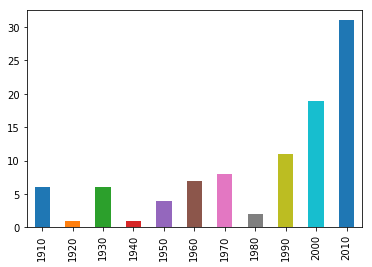

In [35]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [36]:
cast.character.value_counts().head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [37]:
cast[cast.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II        12
Luisa Horga                9
Joyce Brothers             9
Mar?a Luisa (V) Mart?n     9
Hillary Clinton            8
Margaret Thatcher          8
Joan Rivers                6
Marilyn Monroe             6
Rekha                      6
Oprah Winfrey              6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [38]:
cast[cast.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [39]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Frank O'Connor     27
Franklyn Farnum    27
Nolan Leary        27
Herman Hack        25
Larry Steers       25
Tom London         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [40]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Raj Babbar       15
Lou Scheimer     15
Mohanlal         15
Asrani           13
Rajesh Khanna    13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

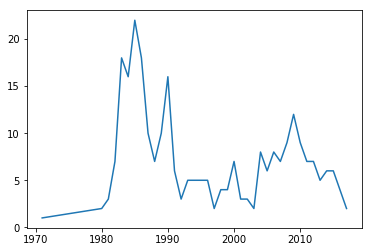

In [41]:
mammogram = cast[cast.name == 'Mammootty']
mammogram.year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [42]:
cast[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [17]:
cast[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Reporter         5
Science Kid              5
Science Fair Kid         5
Science Promo Cadet      5
Science Club Member      5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

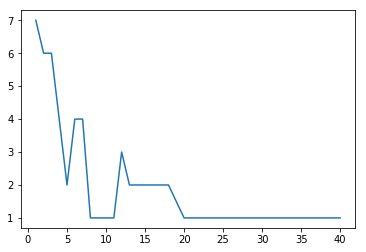

In [18]:
cast[cast.name == 'Judi Dench'].n.value_counts().sort_index().plot()

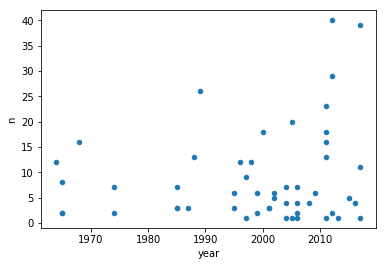

In [19]:
c = cast
c = c[c.name == 'Judi Dench'].sort_values('year')
c[c.n.notnull()].plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

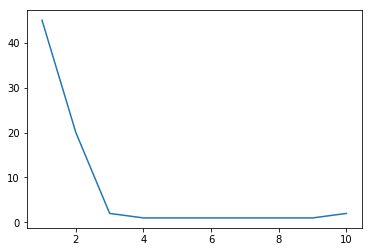

In [20]:
cast[cast.name == 'Cary Grant'].n.value_counts().sort_index().plot()

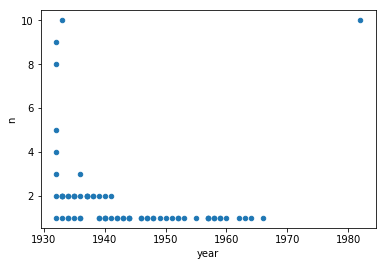

In [21]:
cary = cast[cast.name == 'Cary Grant']
cary = cary.sort_values('year')
cary[cary.n.notnull()].plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

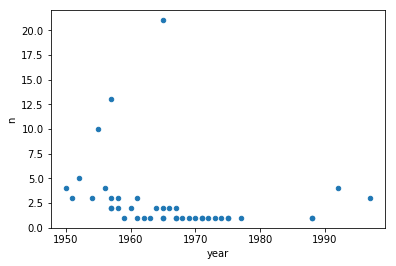

In [22]:
cary = cast[cast.name == 'Sidney Poitier']
cary = cary.sort_values('year')
cary[cary.n.notnull()].plot(x='year', y='n', kind='scatter')

In [23]:
### How many leading (n=1) roles were available to actors and how many to actresses, in the 1950s?

In [24]:
len(cast[(cast.year // 10 == 195) & (cast.n == 1) & (cast.type == 'actor')])

6692

In [25]:
len(cast[(cast.year // 10 == 195) & (cast.n == 1) & (cast.type == 'actress')])

3040

In [26]:
cast[(cast.year // 10 == 195) & (cast.n == 1)].type.value_counts()

actor      6692
actress    3040
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [27]:
cast[(cast.year // 10 == 195) & (cast.n == 2)].type.value_counts()

actor      4640
actress    4635
Name: type, dtype: int64